## Import Main Libraries

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns

## Read in the CSV File

In [245]:
mcost = pd.read_csv('Medical_Cost.csv')

## Explore the Data

In [246]:
print(mcost.shape)
mcost.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [247]:
mcost.isnull().any() # check for null values

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [248]:
mcost.dtypes # check the data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [249]:
mcost.describe() # make sure our data looks proper

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [250]:
# Let's look at the amount of unique values in each categorical feature
print('Region Counts: ','\n', mcost['region'].value_counts())
print('')
print('Smoker Counts: ','\n', mcost['smoker'].value_counts())
print('')
print('Sex: ','\n', mcost['sex'].value_counts())

Region Counts:  
 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Smoker Counts:  
 no     1064
yes     274
Name: smoker, dtype: int64

Sex:  
 male      676
female    662
Name: sex, dtype: int64


## Data Visualization

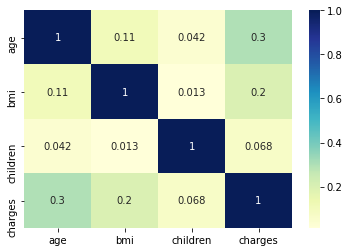

In [251]:
mcost_corr = mcost.corr('pearson') # find the correlation

sns.heatmap(mcost_corr, annot=True, cmap='YlGnBu') # map the correlation 

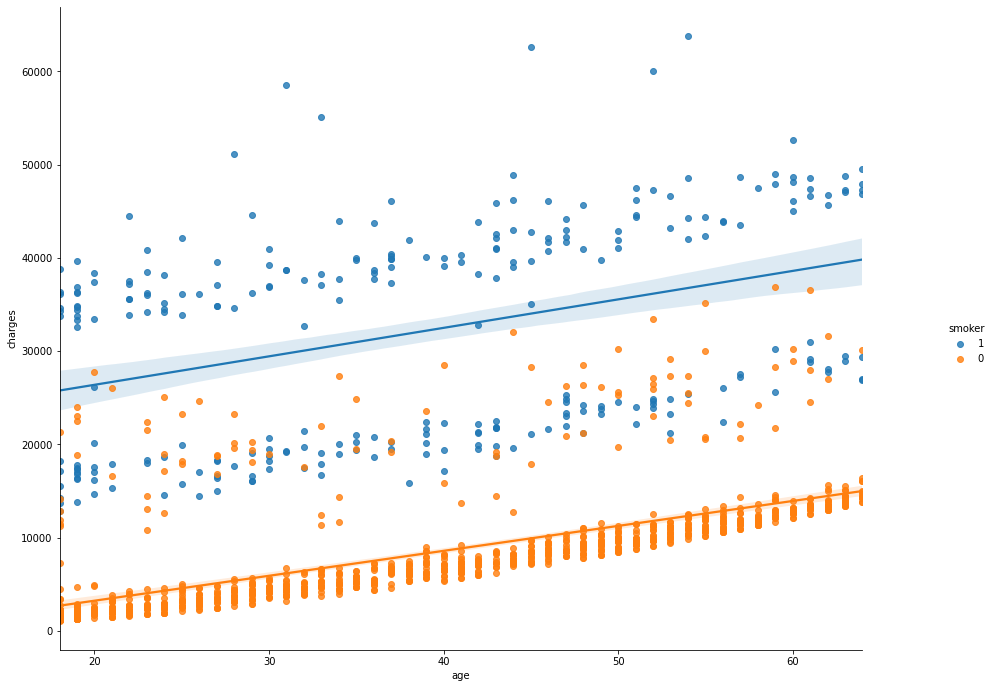

In [281]:
age_lm = sns.lmplot(x='age',  y='charges', data=mcost, hue='smoker')
age_lm.fig.set_size_inches(15,10)


With this graph, we see that if an individual smokes or not bears much more consequence on their medical cost


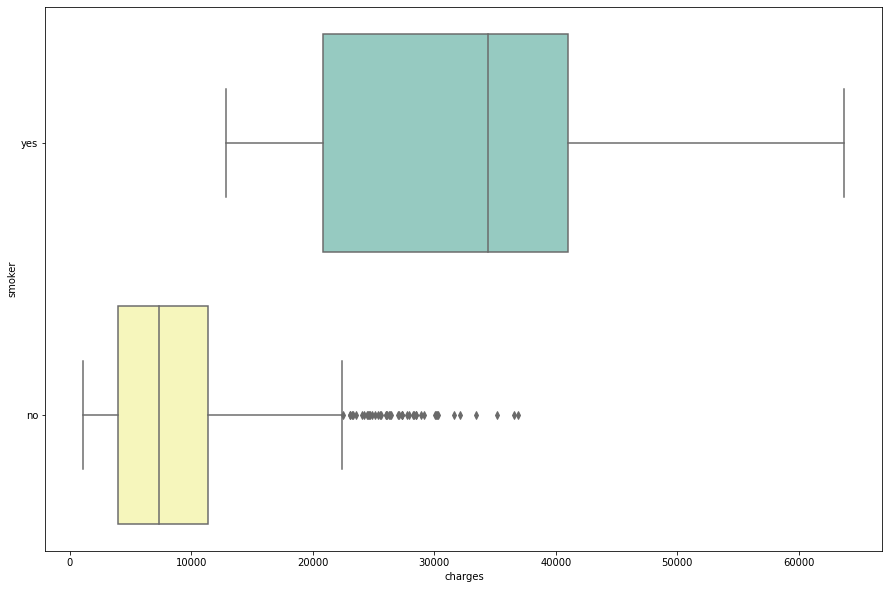

In [253]:
smoker_graph = sns.boxplot(x = 'charges', y='smoker', palette='Set3', orient='h', data=mcost)
smoker_graph.figure.set_size_inches(15,10)
print('With this graph, we see that if an individual smokes or not bears much more consequence on their medical cost')

We can see that there are many more outliers for females when compared to males, but the interquartile range and the maximum is much greater for men. 
 The number of children has a slight impact on the medical cost, but much less so than gender


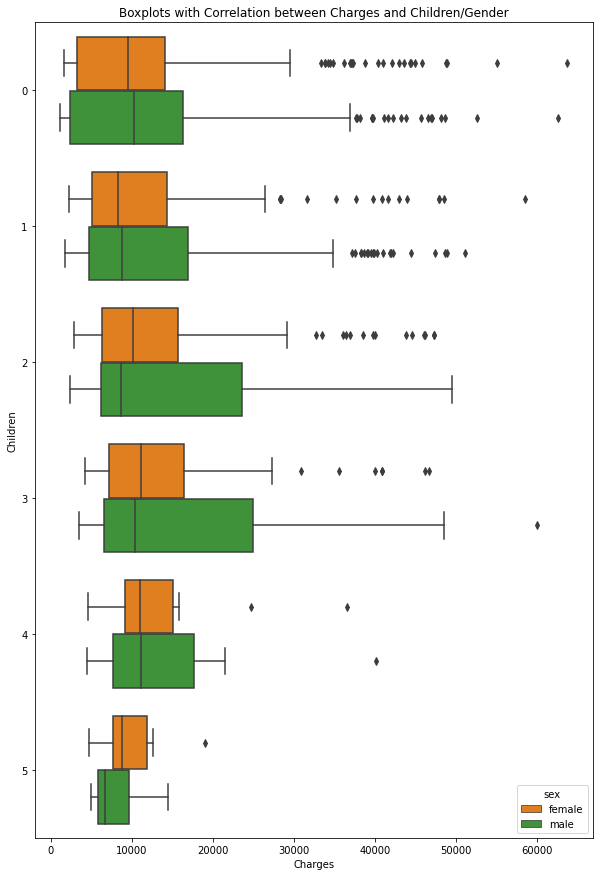

In [254]:
mcost_children = sns.boxplot(x='charges', y='children', hue='sex',palette='Paired_r',orient='h' , data=mcost)
mcost_children.figure.set_size_inches(10,15)
mcost_children.set_xlabel('Charges')
mcost_children.set_ylabel('Children')
mcost_children.set_title('Boxplots with Correlation between Charges and Children/Gender')
 
print('We can see that there are many more outliers for females when compared to males, but the interquartile range and the maximum is much greater for men.','\n', 'The number of children has a slight impact on the medical cost, but much less so than gender')

The bmi seems to have a positive correlation on medical costs.


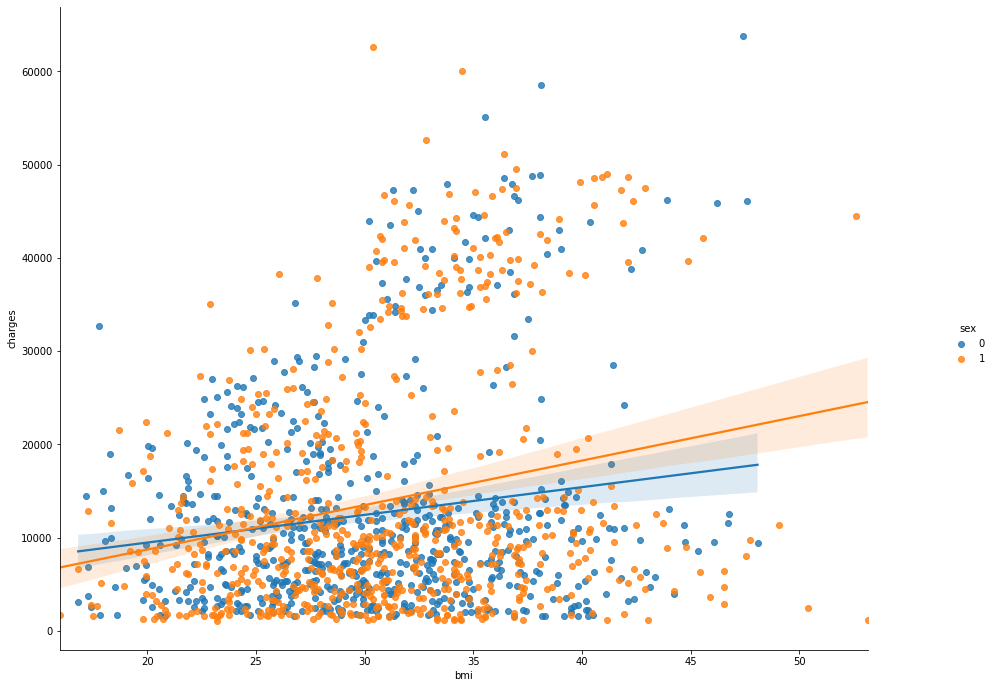

In [290]:
bmi_plot = sns.lmplot(x='bmi', y = 'charges', hue='sex', data=mcost)
bmi_plot.fig.set_size_inches(15,10)

print("The bmi seems to have a positive correlation on medical costs.")

The Southeast has a bigger IQR than any of the other ones. Seems like the SE pays the most on average for medical costs while the SW pays the least on average.


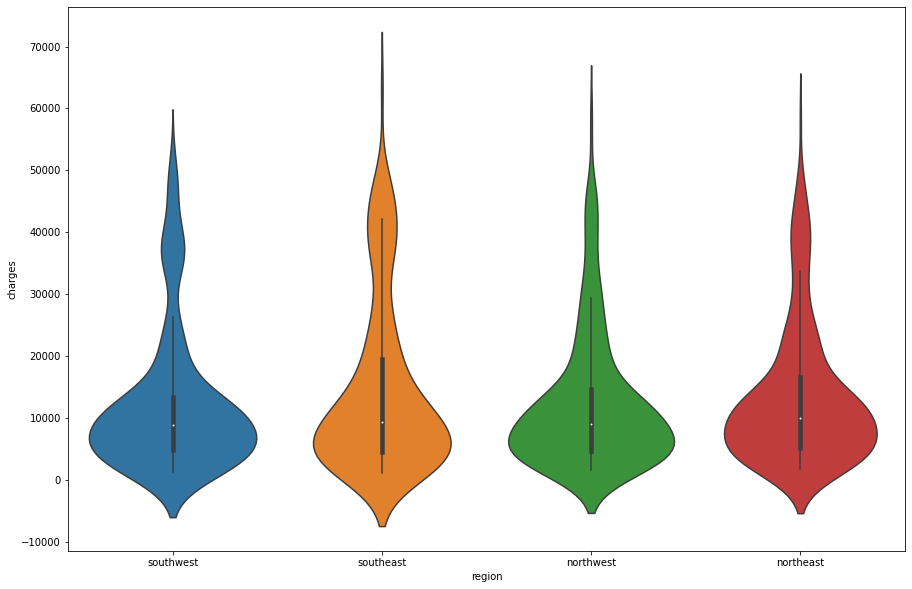

In [294]:
region_violin = sns.violinplot(x='region',y='charges',data=mcost)
region_violin.figure.set_size_inches(15,10)

print('The Southeast has a bigger IQR than any of the other ones. Seems like the SE pays the most on average for medical costs while the SW pays the least on average.')

## Data Prep

In [257]:
# Change the categorical features into integers 
mcost['smoker'] = mcost['smoker'].apply(lambda x: x.replace('yes', '1').replace('no', '0'))

# capitalize the first letter of each entry in sex column (we get a weird error otherwise)
mcost['sex'] = mcost['sex'].str.capitalize()

# change the sex column into 1 and 0 
mcost['sex'] = mcost['sex'].apply(lambda x: x.replace('Female', '0').replace('Male', '1'))

# change the type of the changed columns into integers 
mcost.smoker.astype(int)
mcost.sex.astype(int)
mcost.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [258]:
# Get dummy variables for the region column
dummy_regions = pd.get_dummies(mcost.region, drop_first=True)

# merge the dummy regions dataframe with the original dataframe
mcost_merged_ns = pd.concat([mcost, dummy_regions], axis=1)

# drop the region column
mcost_merged = mcost_merged_ns.drop(columns='region')

# make sure the dataframe looks proper
mcost_merged.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [259]:
# Let's check the correlation again, especially for the regions
print(mcost_merged.corr())
print('There is very little correlation between the charges and the regions so we will drop that column along with the children column')

                age       bmi  children  ...  northwest  southeast  southwest
age        1.000000  0.109272  0.042469  ...  -0.000407  -0.011642   0.010016
bmi        0.109272  1.000000  0.012759  ...  -0.135996   0.270025  -0.006205
children   0.042469  0.012759  1.000000  ...   0.024806  -0.023066   0.021914
charges    0.299008  0.198341  0.067998  ...  -0.039905   0.073982  -0.043210
northwest -0.000407 -0.135996  0.024806  ...   1.000000  -0.346265  -0.320829
southeast -0.011642  0.270025 -0.023066  ...  -0.346265   1.000000  -0.346265
southwest  0.010016 -0.006205  0.021914  ...  -0.320829  -0.346265   1.000000

[7 rows x 7 columns]
There is very little correlation between the charges and the regions so we will drop that column along with the children column


In [260]:
# Split the data so we seperate the charges from the rest of the data
y_target = mcost_merged.charges
X_data = mcost_merged.drop(columns=['charges', 'northwest', 'southeast', 'southwest', 'children'])
X_data.head()

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0


In [309]:
# Turn the features into polynomial features (raise the exponent)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_data)

In [310]:
# split into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y_target, test_size = 0.2, random_state=0)

print('Training Data Shape:', x_train.shape, y_train.shape)
print('Test Data Shape:',x_test.shape, y_test.shape)

Training Data Shape: (1070, 15) (1070,)
Test Data Shape: (268, 15) (268,)


## Regression Model Training

In [311]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [312]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8775614969474647
2778.8858539131547
19483634.37752741
